#**Data 601**





#**Breast cancer Incidence Data Analysis**

Team Name: Team 7

Team members: Lamis Samatar, Romith Bodanda, Gautham Nagaraj

# Introduction
Breast cancer is a significant global health concern, affecting millions of women worldwide. Early detection and effective treatment strategies are crucial for improving patient outcomes. The Surveillance, Epidemiology, and End Results (SEER) Program provides a valuable resource for researchers by collecting comprehensive data on cancer incidence, survival, and patient characteristics.<br>

The significance of the problem is not just the disease but the late diagnosis which leads to terminal death. "Researchers at Queen's University at Kingston in Canada have concluded that even a four-week delay in cancer treatment may increase the risk of death by up to 13 percent". The Data analysis provides insights to the public which motivates people to get an early diagnosis which will eventually reduces the risk of death.The outcome of this data analysis will be
*  Understanding Risk Factors: Identifying the key risk factors associated with breast cancer is critical for early detection and prevention. This knowledge can help inform public health initiatives and personalized risk assessment.<br>
*  Improving Treatment Outcomes: Analyzing survival data and identifying factors that influence patient outcomes can lead to the development of more effective treatment strategies and improved patient care.<br>
*  Supporting Data-Driven Decision Making: The insights gained from analyzing the SEER dataset can inform evidence-based decision-making in breast cancer research, prevention, and treatment.<br>

By investigating the SEER breast cancer dataset, we can contribute to a deeper understanding of this complex disease and potentially inform strategies to improve patient outcomes and reduce the burden of breast cancer on individuals and society.

In [ ]:
#import the necessary libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [ ]:
#Read the datasets
seer_data = pd.read_csv('https://raw.githubusercontent.com/Gautham-Nagaraj/Data-601-Project/main/SEER%20Breast%20Cancer%20Dataset%20.csv')

# Dataset
This dataset of breast cancer patients was obtained from the 2017 November
update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumor size, examined regional LNs, regional positive LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included. The SEET dataset is acquired from IEEE OpenDataPort which is an open data access portal for research. Thus giving us a legitimate and ethical access to the patient data. The personal identity of each patient is not mentioned in the data which complies with patient confidentiality. The survivability estimate data will be examined once the SEER data has been pre-processed.<br>
* ### AGE
SEER*Stat Name: Age at diagnosis<br>
Field Description: This data item represents the age of the patient at diagnosis for this cancer. The code represents the patient’s actual age in years.
*   ### Race
SEER*Stat Name: Race recode (White, Black, Other)<br>
Field Description: Race recode is based on the race variables and the American Indian/Native American IHS link variable. This recode should be used to link to the populations for white, black and other. It is independent of Hispanic ethnicity. For more information, see : http://seer.cancer.gov/seerstat/variables/seer/race_ethnicity.
  1. White

  2. Black

  3. Other (American Indian/AK Native, Asian/Pacific Islander)

  4. Other unspecified (1991+)

  5. Unknown

*   ### MARITAL STATUS
SEER*Stat Name: Marital status at diagnosis<br>
Field Description: This data item identifies the patient’s marital status at the time of diagnosis for the reportable tumor.

  1. Single (never married)

  2. Married (including common law)
  
  3. Separated
  
  4. Divorced

  5. Widowed

*  ### T STAGE
SEER*Stat Name: Breast Adjusted AJCC 6th T (1988+)<br>
Field Description: Refers to the Tumor Stage, part of the TNM staging system. It indicates the size and extent of the main tumor. Created from merged EOD 3rd Edition and Collaborative Stage disease information. Currently only available for Breast schema. For more information see http://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th.

  1. T0 : No evidence of a primary tumor.

  2. T1-T4 : Increasing size and/or local extent of the tumor.



*  ### N STAGE
SEER*Stat Name: Breast Adjusted AJCC 6th N (1988+)<br>
Field Description: Refers to the Node Stage, another component of the TNM staging system. It describes whether cancer has spread to nearby lymph nodes. Created from merged EOD 3rd Edition and Collaborative Stage disease information. Currently only available for Breast schema. For more information see http://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th.

    1. N0 : No regional lymph node involvement.

    2. N1-N3 : Increasing involvement of lymph nodes.



*  ### 6TH STAGE
SEER*Stat Name: Breast Adjusted AJCC 6th Stage (1988+)<BR>
Field Description: Refers to the 6th edition of the AJCC Cancer Staging Manual, which provides a more detailed classification for staging cancers. This stage is based on tumor size, lymph node involvement, and metastasis. Created from merged EOD 3rd Edition and Collaborative Stage disease information. Currently only available for Breast schema. For more information see http://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th.

  1. IIA

  2. IIB

  3. IIIA

  4. IIIB

  5. IIIC


* ### GRADE
SEER*Stat Name: Grade
Field Description: Indicates how much the cancer cells resemble normal cells under a microscope. Grading and differentiation codes of 1-4, 9 are defined in ICD-O-2; 1992. Grade information may be incomplete for cases diagnosed before 1977. In the early 1980’s, additional codes specifying T-cell, B-cell, or null cell involvement in lymphomas and leukemias (histologies M9590-9940) were introduced by SEER. Because the reporting requirements and medical terminology have changed over time, care should be exercised when analyzing this information.

  1. Grade 1: Well-differentiated (resembles normal tissue, less aggressive).

  2. Grade 2: Moderately differentiated.

  3. Grade 3: Poorly differentiated (less like normal cells, more aggressive).

  4. Grade 4: Undifferentiated (most aggressive).

* ### A STAGE
SEER*Stat Name: SEER historic stage A<br>
Field Description: Derived from Collaborative Stage (CS) for 2004+ and Extent of Disease (EOD) from 1973-2003. It is a simplified version of stage: in situ, localized, regional, distant, & unknown. Over time several different EOD schemes have been used. Thus caution should be used when doing trend analysis. For more information including sites and years for which it isn't calculated, see http://seer.cancer.gov/seerstat/variables/seer/lrd-stage.

1. Regional — A neoplasm that has extended
  1. beyond the limits of the organ of origin
directly into surrounding organs or tissues;
  2. into regional lymph nodes by way of the
lymphatic system; or
  3. by a combination of extension and regional lymph nodes.

2. Distant — A neoplasm that has spread to parts of the body remote from the primary
tumor either by direct extension or by discontinuous metastasis (e.g., implantation or
seeding) to distant organs, issues, or via the lymphatic system to distant lymph nodes.

* ### TUMOR SIZE
SEER*Stat Name: CS tumor size (2004+)<br>
Field Description:The size of the tumor in millimeters or centimeters. Larger tumors typically indicate more advanced disease. Information on tumor size. Available for 2004+. Earlier cases may be converted and new codes added which weren't available for use prior to the current version of CS. Each indicates exact size in millimeters. For more information, see http://seer.cancer.gov/seerstat/variables/seer/ajcc-stage.

* ### ESTROGEN STATUS
SEER*Stat Name: ER Status Recode Breast Cancer (1990+)<br>
Field Description: Indicates whether the tumor cells are estrogen receptor-positive (ER+) or negative (ER-). ER+ tumors depend on estrogen to grow and may respond to hormone therapies. Created by combining information from Tumor marker 1 (1990-2003) (NAACCR Item #=1150), with information from CS site-specific factor 1 (2004+) (NAACCR Item #=2880). This field is blank for non-breast cases and cases diagnosed before 1990.
  1. Positive

  2. Negative

* ### PROGESTERONE STATUS
SEER*Stat Name: PR Status Recode Breast Cancer (1990+)<br>
Field Description: Indicates whether the tumor cells are progesterone receptor-positive (PR+) or negative (PR-). PR+ tumors, like ER+ ones, may respond to hormone therapies. Created by combining information from Tumor marker 2 (1990-2003) (NAACCR Item #=1150), with information from CS site-specific factor 2 (2004+) (NAACCR Item #=2880). This field is blank for non-breast cases and cases diagnosed before 1990.

  1. Positive

  2. Negative


* ### REGIONAL NODES EXAMINED
SEER*Stat Name: Regional nodes examined (1988+)<br>
Field Description: Records the total number of regional lymph nodes that were removed and examined by the pathologist.

* ###REGIONAL NODES POSITIVE
SEER*Stat Name: Regional nodes positive (1988+)<br>
Field Description: Records the exact number of regional lymph nodes examined by the pathologist that were found to contain metastases.

* ### SURVIVAL MONTHS
SEER*Stat Name: Survival Months<br>
Field Description: The number of months the patient survived after diagnosis or treatment. It can be used for survival analysis. Created using complete dates, including days, therefore may differ from survival time calculated from year and month only. For more information, see http://seer.cancer.gov/survivaltime.
* ### STATUS
SEER*Stat Name: Vital status recode (study cutoff used)<br>
Field Description: Any patient that dies after the follow-up cut-off date is recoded to alive as of the cut-off date.

  1. Alive

  2. Dead

Let us have glance at how the data looks like.

In [ ]:
seer_data.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


#Analysis

##Statistical Analysis

In [ ]:
seer_data.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,NaN,30.473658,14.357107,4.158052,71.297962
std,8.963134,NaN,21.119696,8.099675,5.109331,22.921430
min,30.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,69.000000,NaN,140.000000,61.000000,46.000000,107.000000


In [ ]:
#Return the number of rows and columns
seer_data.shape

(4024, 16)

In [ ]:
#The following line of code checks for null values and returns a boolean value True or False
#The sum function adds the True values (as 1) and gives us the total missing columns
seer_data.isna().sum()

,0
Age,0
Race,0
Marital Status,0
Unnamed: 3,4024
T Stage,0
N Stage,0
6th Stage,0
Grade,0
A Stage,0
Tumor Size,0


In [ ]:
#The above data clearly indicates that the column 'Unanamed: 3' has no data at all and can be dropped entirely.
seer_data = seer_data.drop('Unnamed: 3', axis=1)
seer_data.isna().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
Grade,0
A Stage,0
Tumor Size,0
Estrogen Status,0


In [ ]:
#We can verify that the column has been dropped by checking the shape again.
seer_data.shape

(4024, 15)

In [ ]:
#Get the data type of each column by iterating thorugh each column and using the dtype method
for col in seer_data.columns:
  print("The data type of {}".format(col), "is :{}".format(seer_data[col].dtype))

The data type of Age is :int64
The data type of Race  is :object
The data type of Marital Status is :object
The data type of T Stage  is :object
The data type of N Stage is :object
The data type of 6th Stage is :object
The data type of Grade is :object
The data type of A Stage is :object
The data type of Tumor Size is :int64
The data type of Estrogen Status is :object
The data type of Progesterone Status is :object
The data type of Regional Node Examined is :int64
The data type of Reginol Node Positive is :int64
The data type of Survival Months is :int64
The data type of Status is :object


Let us look at the values in each column of our data

In [ ]:
for col in seer_data:
  print(col,seer_data[col].unique())

Age [43 47 67 46 63 49 64 55 59 61 62 53 69 58 31 41 57 40 66 51 42 38 39 50
 48 32 45 68 33 44 52 60 34 65 54 37 56 35 36 30]
Race  ['Other (American Indian/AK Native, Asian/Pacific Islander)' 'White'
 'Black']
Marital Status ['Married (including common law)' 'Divorced' 'Single (never married)'
 'Widowed' 'Separated']
T Stage  ['T2' 'T1' 'T3' 'T4']
N Stage ['N3' 'N2' 'N1']
6th Stage ['IIIC' 'IIIA' 'IIB' 'IIA' 'IIIB']
Grade ['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
A Stage ['Regional' 'Distant']
Tumor Size [ 40  45  25  19  35  32  22  15  70  55  47  38  26  17  12   2  51  42
  30  20  13  10  65  50  16  14 100  21   9   7  85  24  23  36  11   6
  61   8  52  90  34  43  28  18  27 120  60  31   3  75  72  48  92   5
 130  95  80  67  97  76  37  33  56  83  82 105   4  63  29  44  66  78
  58 140  62  54  39  41 110   1 125  49  74  68  53  59 101  46  98  64
 133 117  57 115 

In [ ]:
# function to extract the grade type from the 'Grade' column
def extract_grade(grade_string):
  """
  Extracts the "Grade I", "Grade II", etc. from a grade string.

  Args:
    grade_string: The input string containing the grade.

  Returns:
    The extracted grade string (e.g., "Grade I", "Grade II").
  """
  match = re.search(r"Grade \w*", grade_string)
  if match:
    return match.group(0)
  else:
    return grade_string  # Handle cases where no grade is found


seer_data['Grade'] = [extract_grade(grade) for grade in seer_data['Grade']]



##Outlier Analysis
 The box plot visualises the distribtion of the data points of columns 'Age' and 'Survival Months'. The plots provides an evidence that there a few outlier in the 'Survival Months' data. There are no visible outliers in the 'Age' data.




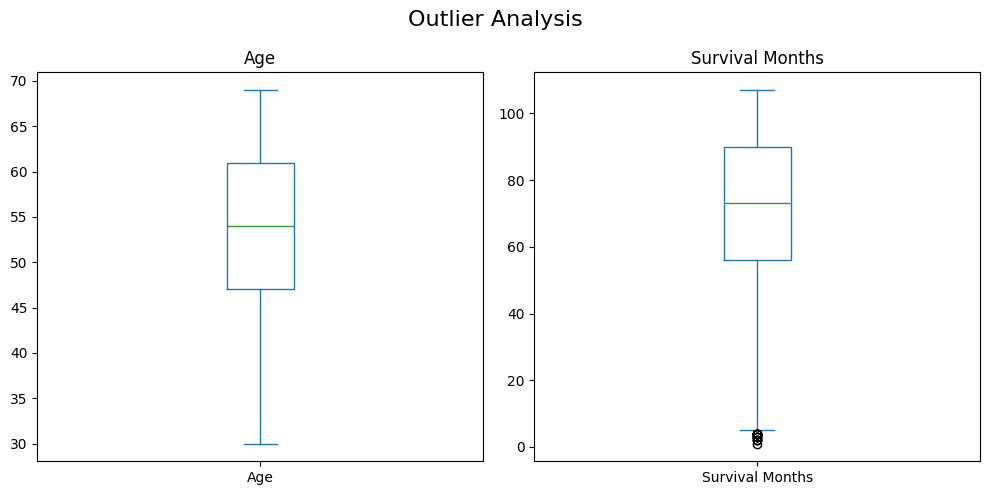

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Select the columns for which you want to create box plots
columns_to_plot = ['Age', 'Survival Months']

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create a box plot for each selected column
for i, column in enumerate(columns_to_plot):
    seer_data[column].plot.box(ax=axes[i], title=column)
fig.suptitle('Outlier Analysis', fontsize=16)
plt.tight_layout()
plt.show()

Inorder to detect particularly which data points are considered as outliers, We are using Interquartile Range (IQR) method.

In [ ]:
def detect_outliers_iqr(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers.index.tolist()

outlier_indices = detect_outliers_iqr(seer_data['Survival Months'])

# Print the indices of the detected outliers
print("Indices of outliers:", outlier_indices)

# Optionally, you can filter out the outliers from the DataFrame
seer_data_no_outliers = seer_data.drop(outlier_indices)

Indices of outliers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [ ]:
seer_data=pd.DataFrame(seer_data_no_outliers)
seer_data.shape

(4006, 15)

The data has been cleaned and is ready for analysis.

It is important to keep in mind what the data type of each column is, as some columns which appear numerical actually have catergorical values.
Based on the guiding question we need to calculate the survavability rate, thus we need to modify the 'Status' column to numerical or boolean values so that we can sum them and get the survivability rate.

In [ ]:
#Using the replace method to convert the categorical values to numerical values.
#Now we can sum the column 'Status' and divide it by the total entries to get the survivability rate.
#https://www.geeksforgeeks.org/convert-a-dataframe-column-to-integer-in-pandas/
seer_data['Status'] = seer_data['Status'] .replace({'Alive': 1,'Dead':0}, regex=True).astype(int)
seer_data.head()

<ipython-input-15-d72631ff544a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  seer_data['Status'] = seer_data['Status'] .replace({'Alive': 1,'Dead':0}, regex=True).astype(int)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
18,64,White,Married (including common law),T3,N1,IIIA,Grade II,Regional,51,Positive,Positive,16,1,5,0
19,31,White,Divorced,T2,N1,IIB,Grade II,Regional,42,Positive,Positive,9,3,5,1
20,31,Black,Single (never married),T2,N2,IIIA,Grade III,Regional,30,Negative,Negative,13,4,5,0
21,41,Black,Single (never married),T1,N1,IIA,Grade II,Regional,20,Negative,Negative,2,2,5,0
22,57,White,Married (including common law),T1,N1,IIA,Grade II,Regional,13,Positive,Positive,11,1,5,0


In [ ]:
#Verifying that there are no null values, which may have been populated by the replace method.
seer_data['Status'].isna().sum()

0

## Guiding Questions And The Insights

Our other guiding question is to understand what the survivability rate of a patient is based on thier race.
We can group the data by the race and survivability rate to help answer this question.  

In [ ]:
stats_race = pd.pivot_table(seer_data, index='Race ', values='Status', aggfunc='mean')
print(stats_race)

                                                      Status
Race                                                        
Black                                               0.754325
Other (American Indian/AK Native, Asian/Pacific...  0.896226
White                                               0.853192


The above table gives us the survivability of each race mentioned in the data set.
Note that these race groups have been grouped in one category 'Other' - American Indian, AK Native, Asian, Pacific Islander.
From the pivot table it is clear that the black demographic has the lowest survivability compared to other races.
This could be due to the patients age being too high or the number of patients.
Let us examine these further in the following code blocks.

In [ ]:
print("Number of 'other' race patients in the group: ",seer_data.loc[seer_data['Race ']== 'Other (American Indian/AK Native, Asian/Pacific Islander)'].agg('count').iloc[0])
print("Number of white race patients in the group: ",seer_data.loc[seer_data['Race ']== 'White'].agg('count').iloc[0])
print("Number of black race patients in the group: ",seer_data.loc[seer_data['Race ']== 'Black'].agg('count').iloc[0])

Number of 'other' race patients in the group:  318
Number of white race patients in the group:  3399
Number of black race patients in the group:  289


In [ ]:
#The above code was performed using the boolean indexing, deriving the count from the individual column based on a condition.
#https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik
#It is clear that the number of black patients overall are less compared to other race groups, which could affect the survivability rate.

In [ ]:
#let us observe the average age of the patients by race
#We need to create  a new pivot table to include values by 'age'
stats_race_age = pd.pivot_table(seer_data, index='Race ', values='Age', aggfunc='mean')
print(stats_race_age)

                                                          Age
Race                                                         
Black                                               52.532872
Other (American Indian/AK Native, Asian/Pacific...  51.471698
White                                               54.308620


In [ ]:
#So we can eliminate age as a bias, since the average age of all the demographics are close, aprroximately 52

Moving on to the next guiding question: 'Survivability based on Marital Status'

In [ ]:
#Let us a create a pivot table as done previously
stats_marital_status = pd.pivot_table(seer_data, index='Marital Status', values='Status', aggfunc='mean')
print(stats_marital_status.sort_values(by = 'Status'))

                                  Status
Marital Status                          
Separated                       0.659091
Widowed                         0.798283
Divorced                        0.819876
Single (never married)          0.833605
Married (including common law)  0.866312


In [ ]:
#This table gives us some interseting stats based on a patient's martial status
for cols in seer_data['Marital Status'].unique():
  print("Number of {} ".format(cols), "patients in the dataset: ",seer_data.loc[seer_data['Marital Status']== cols].agg('count').iloc[0])

#Instead of maunally typing print statements we can use a for loop and iterate through the 'unique' data in Marital status and get the total count.
#https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

Number of Married (including common law)  patients in the dataset:  2633
Number of Divorced  patients in the dataset:  483
Number of Single (never married)  patients in the dataset:  613
Number of Widowed  patients in the dataset:  233
Number of Separated  patients in the dataset:  44


In [ ]:
#The distribution of pateients across the martital status can have a little bias.
#It is better to visualize the data rather than print them out in this fashion.

Moving on to our next guiding question:
What is the survivability rate of a patient living in Canada vs the USA

It has been stated that the USA is leading in cancer treatment by multiple sources:

https://www.insidermonkey.com/blog/5-best-countries-for-cancer-treatment-1140271/5/

https://finance.yahoo.com/news/15-best-countries-cancer-treatment-113926880.html

Where Canada ranks 7 on the list.
We will, through the datasets we have, study whether this is true or not by measuring the survivability rate for each country.

In [ ]:
#The SEER dataset, or the 'main' dataset is from the USA.
#To compare this with the health data from Canada, we will be make use of statistic information provided by
#As we did not receive permission to use the Canadian dataset we will use the image to obtain results and compare the two.

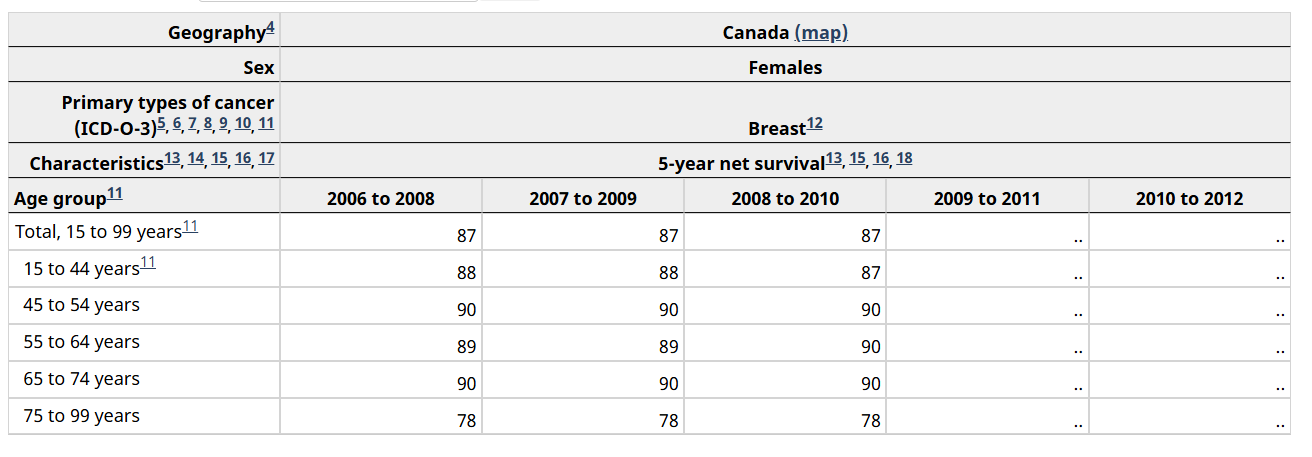

In [ ]:
#The table above obtained from an open data source https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310015801 gives us the survivability rate across age groups from the year 2006-2010.
#The SEER data also consists of data from 2006-2010. So by comparing these 2 we can get an estimate on the surviability rate of the USA vs Canada.

In [ ]:
#We will have to manually add all the columns and take the average to find the average surviavbility rate of breast cancer in Canada from 2006-2010
avg_survival_can = (87+88+90+89+90+78+87+88+90+89+90+78+87+87+90+90+90+78)/(6*3)
avg_survival_can
#The average is caluated by the sum divided by total age groups across 3 years -> 6*3

87.0

In [ ]:
avg_survival_us = seer_data['Status'].mean()
print(round(avg_survival_us,2))

0.85


In [ ]:
#Although the US is leading in cancer treatment worldwide the survivability rate is lower when compared to Canada.

**Visualizations:**

**Histogram: Distribution of Survival Months.**

**What it shows:**

This shows the spread of survival over the months for all patients. Peaks show typical survival times. It is a right skewed distribution which shows while there are some very long survival times, most people have relatively short survival times.

In [ ]:
#Histogram: Distribution of survival months
import plotly.express as px
import plotly.graph_objects as go

# Histogram: Distribution of Survival Months
hist_fig = px.histogram(
    seer_data, x='Survival Months', nbins=50, title='Distribution of Survival Months',
    labels={'Survival Months': 'Survival Duration (Months)'}, opacity=0.7,
    color_discrete_sequence=['pink']
)

hist_fig.show()

**Bar Chart: Survivability by Race**

**What it shows:**

The average survival rates for each demographic group. A higher survival rate means a larger number of survivors in that specific demographic group.

In [ ]:
# Bar Chart: Survivability by Race
race_survival = seer_data.groupby('Race ')['Status'].mean().reset_index()
bar_fig_race = px.bar(
    race_survival,
    x='Race ',
    y='Status',
    title='Survivability Rate by Race',
    labels={"Status": "Survival Rate", 'Race ': 'Demographic Group'},
    color='Race ',
    color_discrete_sequence=['pink']
)

bar_fig_race.show()

**Bar Chart: Survivability by Marital Status**

**What it shows:**

Compares survival rates based on marital status ie. divorced, married, single and widowed. Married patients have a higher survival rate compared to all the other groups. This may indicate that social support may impact survivability.

In [ ]:
# Bar Chart: Survivability by Marital Status
marital_survival = seer_data.groupby('Marital Status')['Status'].mean().reset_index()
bar_fig_marital = px.bar(
    marital_survival,
    x='Marital Status',
    y='Status',
    title='Survivability Rate by Marital Status',
    labels={'Status': 'Survival Rate', 'Marital Status': 'Marital Category'},
    color='Status',
    color_continuous_scale='Blues'
)

bar_fig_marital.show()

**Scatter Plot: Survival months vs. tumor size**

**What it shows:**

This shows how tumer size relates to survival. Each point is a patient and the colour represents whether they are alive or dead. Yellow = alive and Purple = dead. Larger tumer sizes are associated with lower survival. This could help us with early detection.

In [ ]:
#Scatter Plot: Survival months vs. tumor size
scatter_fig = px.scatter(
    seer_data,
    x='Tumor Size',
    y='Survival Months',
    color='Status',
    title='Survival Months vs. Tumor Size',
    labels={'Survival Months': 'Survival Duration (Months)'},
    opacity=0.6,
    color_continuous_scale='Viridis'
)

scatter_fig.show()

**Heatmap: Correlation matrix of survival factors**

**What it shows:**

It shows how strongly different variables are realted.A strong correlations being closer to 1 while inverse being closer to -1. key correlations: Survival Months vs. Tumor Size, Survival Months vs. Age, Survival Months vs. Regional Node Positive.

In [ ]:
#Heatmap: Correlation matrix of survival factors
correlation_matrix = seer_data[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']].corr()
heatmap_fig = px.imshow(
    correlation_matrix, text_auto=True,
    title='Correlation Heatmap',
    labels=dict(color='Correlation'),
    color_continuous_scale='RdBu_r'
)

heatmap_fig.show()

**Box Plot: Survival months across different groups**

**What it shows:**

The spread and distrubution of survival times across different races. It shows the variations in survival outcomes in different racial groups which could help us identify inequalities in cancer care.

In [ ]:
# Box Plot: Survival Months by Race
box_fig = px.box(
    seer_data, x='Race ', y='Survival Months', title='Survival Months Distribution by Race',
    labels={'Survival Months': 'Survival Duration (Months)'},
    color='Race ', points='all'
)

box_fig.show()

The results obtained above are based on sample data and do not represent the actual statistics.

It is also important to note that we should consider columns that have the most impact on survivability rate. This will be done during the PCA and answer the next guiding question.

## Principle Component Analysis


Principle Component Analysis is a widely used machine learning algorithm for feature dimentionality reduction. The reduction technique transforms a high-dimensional data into a lower-dimensional space while preserving as much variance as possible. The reduction technique involves


*   Standardizing the data.
*   Computing the covariance matrix.
*   Perform eigen decomposition of the covariance matrix to get eigenvalues (variance) and eigenvectors (principal components).
*   Projecting the data onto the new principal component axes.

## 1.Standardizing The Data
The data is standardized by projecting the original data onto scalars.
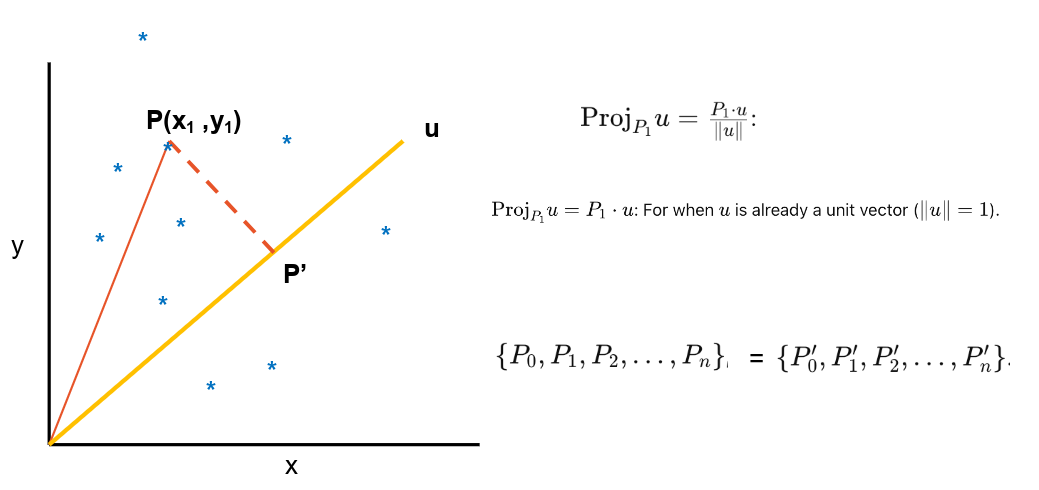

## 2.Computing the covariance matrix.
The covariance matrix is a square matrix where each element represents the covariance between two features. Covariance measures how two variables change together.<br>
$ COV(X) = \frac{1}{n-1}X^TX  $
## 3.Perform eigen decomposition of the covariance matrix to get eigenvalues (variance) and eigenvectors (principal components).
Inorder to find the principal components, the eigenvectors and eigenvalues of the covariance matrix are calculated. Eigenvectors represent the directions of maximum variance in the data.<br>
$Av = \lambda v$ <br>
$v = DET(A-λI) = 0$<br>
The principle components are selected based on the ranking of the eigen values of each eigen vector. The eigenvector with the largest eigenvalue will be the first principal component.

## 4.Projecting the data onto the new principal component axes.
$Z = X\cdot V_k $<br>
The standardized data is multiplied by the selected eigenvectors (projection matrix). This transforms the data into a new coordinate system defined by the principal components.The loadings (coefficients) of the original featuresare examined on each principal component to understand which features contribute most to each component.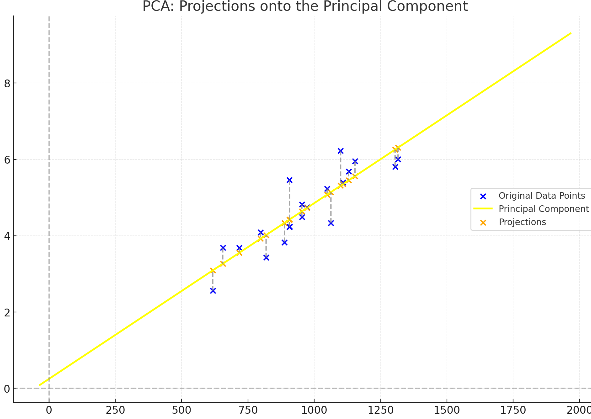


In [ ]:
df=seer_data

Inorder to perform Principle Component Analysis, the data should be numerical. As the data contains number of categorical columns, We are converting them into numerical values using different encoding techniques.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Note:** scikit-learn (formerly scikits. learn and also known as sklearn) is a free and open-source machine learning library for the Python programming language.

In [ ]:
# The below columns are having data with high cardinality which means the data is having only two values.
# So we are using Binary Encoding to convert them into 0 and 1
le = LabelEncoder()
df['Estrogen Status']=le.fit_transform(df['Estrogen Status'])
df['Progesterone Status']=le.fit_transform(df['Progesterone Status'])
df['A Stage']=le.fit_transform(df['A Stage'])

In [ ]:
# The below columns are having data with categories of inherent order such as stages of progressing cancer
# So, we are using Label Encoding to transform the data
df['T Stage '] = le.fit_transform(df['T Stage '])+1
df['N Stage'] = le.fit_transform(df['N Stage'])+1
df['6th Stage']=le.fit_transform(df['6th Stage'])+1
df['Grade']=le.fit_transform(df['Grade'])+1

In [ ]:
# The below columns are having Nomial data
# Usually we could use One-Hot Encoding but to reduce the data column size, we are using Frequency Encoding as the the proportion of the categories is highly imbalanced
df['Marital Status'] = df['Marital Status'].map(df['Marital Status'].value_counts())
df['Race '] = df['Race '].map(df['Race '].value_counts())


In [ ]:
for col in df:
  print(col,df[col].unique())

Age [64 31 41 57 40 62 66 49 61 63 51 46 58 42 38 67 39 53 50 48 32 55 59 45
 68 33 44 52 69 60 34 65 43 54 37 47 56 35 36 30]
Race  [3399  289  318]
Marital Status [2633  483  613  233   44]
T Stage  [3 2 1 4]
N Stage [1 2 3]
6th Stage [3 2 1 5 4]
Grade [2 3 1 4]
A Stage [1 0]
Tumor Size [ 51  42  30  20  13  10  70  65  50  40  16  14 100  55  21   9   7  85
  45  24  23  22  36  35  19  15  12  11   6  61   8  52  38  90  34  43
  28  26  25  18  17  27 120  60  32  31   3  75  72  48  92   5 130  95
  80  67  47  97  76  37  33   2  56  83  82 105   4  63  29  44  66  78
  58 140  62  54  39  41 110   1 125  49  74  68  53  59 101  46  98  64
 133 117  57 115  79  96  86  84  73 103  88  87  77 108  94 123  69  81
 104 107]
Estrogen Status [1 0]
Progesterone Status [1 0]
Regional Node Examined [16  9 13  2 11  3 20 12 17 18  5 15 32 37 30  8  4 47 24 25 21 19 38  6
 34  7 14 22 35 23 29 28  1 40 26 10 27 36 31 33 54 41 57 49 42 51 39 61
 60 46 43 44 45 52]
Reginol Node Positive [ 1

In [ ]:
#Get the data type of each column by iterating thorugh each column and using the dtype method
for col in seer_data.columns:
  print("The data type of {}".format(col), "is :{}".format(seer_data[col].dtype))

The data type of Age is :int64
The data type of Race  is :int64
The data type of Marital Status is :int64
The data type of T Stage  is :int64
The data type of N Stage is :int64
The data type of 6th Stage is :int64
The data type of Grade is :int64
The data type of A Stage is :int64
The data type of Tumor Size is :int64
The data type of Estrogen Status is :int64
The data type of Progesterone Status is :int64
The data type of Regional Node Examined is :int64
The data type of Reginol Node Positive is :int64
The data type of Survival Months is :int64
The data type of Status is :int64


As we can see that we have converted all of our data to integer format.

In [ ]:
# splitting the data into feature columns and target column
X = df.drop(columns='Survival Months')
y = df['Survival Months']
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset")
print(X.head())

First 5 rows of the dataset
    Age  Race   Marital Status  T Stage   N Stage  6th Stage  Grade  A Stage  \
18   64   3399            2633         3        1          3      2        1   
19   31   3399             483         2        1          2      2        1   
20   31    289             613         2        2          3      3        1   
21   41    289             613         1        1          1      2        1   
22   57   3399            2633         1        1          1      2        1   

    Tumor Size  Estrogen Status  Progesterone Status  Regional Node Examined  \
18          51                1                    1                      16   
19          42                1                    1                       9   
20          30                0                    0                      13   
21          20                0                    0                       2   
22          13                1                    1                      11   

    Regino

In [ ]:
#Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled is now a NumPy array with standardized features
print("Shape of standardized data:", X_scaled.shape)
display(X_scaled[:5])

Shape of standardized data: (4006, 14)


array([[ 1.12067354,  0.42258411,  0.71924308,  1.5865362 , -0.63076545,
         0.53706328, -0.23552616,  0.1533146 ,  0.97114079,  0.26829624,
         0.4581554 ,  0.20260644, -0.61723648, -2.37559454],
       [-2.56109789,  0.42258411, -1.38080239,  0.28120369, -0.63076545,
        -0.25275886, -0.23552616,  0.1533146 ,  0.54534108,  0.26829624,
         0.4581554 , -0.6617614 , -0.22565372,  0.42094725],
       [-2.56109789, -2.38002285, -1.2538229 ,  0.28120369,  0.81232215,
         0.53706328,  1.32917996,  0.1533146 , -0.02239186, -3.72722327,
        -2.18266552, -0.16783692, -0.02986234, -2.37559454],
       [-1.44540958, -2.38002285, -1.2538229 , -1.02412883, -0.63076545,
        -1.042581  , -0.23552616,  0.1533146 , -0.49550265, -3.72722327,
        -2.18266552, -1.52612924, -0.4214451 , -2.37559454],
       [ 0.33969172,  0.42258411,  0.71924308, -1.02412883, -0.63076545,
        -1.042581  , -0.23552616,  0.1533146 , -0.8266802 ,  0.26829624,
         0.4581554 , -0.41

In [ ]:
# Set the number of principal components
n_components = 2

# Create a PCA instance and apply it to the standardized data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Display the shape of the PCA-transformed data
print("Shape of PCA-transformed data:", X_pca.shape)

Shape of PCA-transformed data: (4006, 2)


In [ ]:
# Calculate how much of the original data is retained by the principle components
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained Variance Ratio for {n_components} components:")
for i, ratio in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {ratio:.2%}")


Explained Variance Ratio for 2 components:
Principal Component 1: 26.42%
Principal Component 2: 11.60%


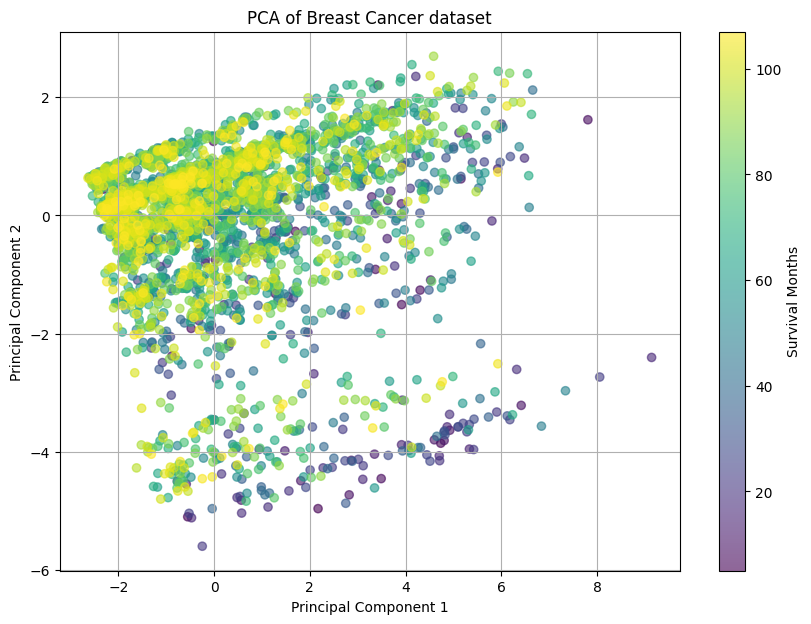

In [ ]:
# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Breast Cancer dataset")
cbar = plt.colorbar(scatter)
cbar.set_label("Survival Months")
plt.grid(True)
plt.show()

###Interpretation of the PCA Plot
*  This plot reduces high-dimensional data into two principal components (PC1 & PC2), capturing as much variance as possible.
*  As you can see the subtle cluster on the top left which suggests distinct patterns in the dataset.
*  The data points are not evenly spread across the 'Survival Months' axis which indicates that the number of survival months is affected by the components.
* The denser cluster represents the possibility that patients with similar features may share similar survival outcomes.
*  The wide spread along PC1 suggests high variance in that direction, meaning it captures the most important feature variations.

In [ ]:
import numpy as np
import pandas as pd

# Assuming you have already fitted PCA
feature_names = X.columns  # Replace with your actual feature names
pc_loadings = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Show contributions for PC1 and PC2
print(pc_loadings.loc[['PC1', 'PC2']])


          Age     Race   Marital Status  T Stage    N Stage  6th Stage  \
PC1 -0.025951 -0.021233       -0.042711  0.338170  0.439729   0.487003   
PC2  0.048707  0.117759        0.050994  0.116703  0.092756   0.120492   

        Grade   A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
PC1  0.152146 -0.193896    0.317988        -0.120847            -0.112582   
PC2 -0.324343 -0.053051    0.105761         0.614742             0.603385   

     Regional Node Examined  Reginol Node Positive    Status  
PC1                0.216832               0.419515 -0.200027  
PC2                0.097685               0.104017  0.250753  


In [ ]:
top_features_pc1 = pc_loadings.loc['PC1'].abs().sort_values(ascending=False).head(5)
top_features_pc2 = pc_loadings.loc['PC2'].abs().sort_values(ascending=False).head(5)

print("Top features contributing to PC1:\n", top_features_pc1)
print("Top features contributing to PC2:\n", top_features_pc2)


Top features contributing to PC1:
 6th Stage                0.487003
N Stage                  0.439729
Reginol Node Positive    0.419515
T Stage                  0.338170
Tumor Size               0.317988
Name: PC1, dtype: float64
Top features contributing to PC2:
 Estrogen Status        0.614742
Progesterone Status    0.603385
Grade                  0.324343
Status                 0.250753
6th Stage              0.120492
Name: PC2, dtype: float64


In [ ]:
# Creating a dataframe for top contributing features
top_features_pc1.index.name = 'Top Contributing Features'
top_features_pc2.index.name = 'Top Contributing Features'
top_features=pd.concat([top_features_pc1,top_features_pc2],axis=1)

In [ ]:
# Plotting the contribution of features to their Principle Components
fig_pie = px.pie(
    top_features,
    values='PC1',
    names=top_features.index,
    title='Contribution of Features to First Principle Component'
)
fig_pie.show()
fig_pie = px.pie(
    top_features,
    values='PC2',
    names=top_features.index,
    title='Contribution of Features to Second Principle Component'
)
fig_pie.show()


The number of principle components have been set to 2. These principle components are having a variance ratio of 26.42% and 11.60%. The features contributing to the principle components have listed below with their respecting PCA component loggings(Eigen Vector values).

|Top Contributing Features|PC1|PC2|
|---|---|---|
|6th Stage|0\.48700267536169173|0\.12049154861360147|
|N Stage|0\.43972944673762315|NaN|
|Reginol Node Positive|0\.41951509296954903|NaN|
|T Stage |0\.33817036711502235|NaN|
|Tumor Size|0\.3179876501116997|NaN|
|Estrogen Status|NaN|0\.6147418195571729|
|Progesterone Status|NaN|0\.6033850334092894|
|Grade|NaN|0\.3243433837848273|
|Status|NaN|0\.2507533349612633|

The provided values are the absolute values of each feature.Higher absolute values in the PCA loadings indicate stronger influence of a feature on that principle component.

# Conclusion

# References